## Loading Dependencies

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px


from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import os

## Loading Data

In [7]:
os.getcwd()

'/Users/ze/Documents/Coding/Projects/alturos/notebooks/Modeling/01_DBSCAN'

In [12]:
# update file path depending in your folder structure 
file='/Users/ze/Documents/Coding/Projects/alturos/data/processed/df_206_reduced_sample_rate.csv'

In [16]:
df= pd.read_csv(file)
df.shape

(12374, 44)

In [19]:
# Convert 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12374 entries, 0 to 12373
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 12374 non-null  datetime64[ns]
 1   accelX(g)                 12373 non-null  float64       
 2   accelY(g)                 12373 non-null  float64       
 3   accelZ(g)                 12373 non-null  float64       
 4   accelUserX(g)             12373 non-null  float64       
 5   accelUserY(g)             12373 non-null  float64       
 6   accelUserZ(g)             12373 non-null  float64       
 7   gyroX(rad/s)              12373 non-null  float64       
 8   gyroY(rad/s)              12373 non-null  float64       
 9   gyroZ(rad/s)              12373 non-null  float64       
 10  Roll(rads)                12373 non-null  float64       
 11  Pitch(rads)               12373 non-null  float64       
 12  Yaw(rads)         

In [37]:
df.head(50)

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,ActivityType,ActivityConfidence,Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX(µT),calMagY(µT),calMagZ(µT)
0,2023-04-09 09:09:39,-0.0725,-0.9272,-0.7220,-0.0473,0.0011,-0.4685,-0.3570,0.0006,-0.3407,...,Stationary,Low,78.7129,1.9182,-116.1901,-95.9268,-76.0076,-4.0338,-40.8268,4.5567
1,2023-04-09 09:09:40,0.2685,-1.1419,-0.3352,0.2776,-0.1910,0.0061,0.6376,-0.9903,0.3236,...,Stationary,Low,78.7129,1.9182,-115.9480,-95.7694,-75.5397,-3.6450,-41.1244,5.2107
2,2023-04-09 09:09:41,-0.1160,-0.8515,-0.5708,-0.0257,0.0061,-0.0485,-0.1042,0.0347,-0.0230,...,Unknown,High,78.7068,2.5420,-116.5621,-95.5421,-80.9511,-4.3155,-40.2013,-1.1107
3,2023-04-09 09:09:42,-0.1177,-0.8770,-0.4650,-0.0182,-0.0108,0.0350,-0.0410,0.0661,-0.0015,...,Unknown,High,78.7002,3.2183,-116.4982,-95.2317,-80.0228,-4.6972,-40.1297,0.1049
4,2023-04-09 09:09:43,-0.1802,-0.8674,-0.3573,-0.0461,0.0038,0.1109,-0.2186,0.3179,-0.0512,...,Unknown,High,78.6940,3.8552,-117.1008,-95.2255,-80.6023,-5.1725,-40.2576,-0.4379
5,2023-04-09 09:09:44,-0.0499,-0.8538,-0.5640,0.0694,-0.0224,-0.0201,0.0970,0.0127,0.2424,...,Unknown,High,78.6876,4.5078,-113.0079,-94.0016,-87.9477,-1.3713,-39.0608,-7.1799
6,2023-04-09 09:09:45,-0.3849,-0.5468,1.4922,0.2134,0.2101,0.9702,1.4494,1.2317,1.3107,...,Unknown,High,78.6876,4.5078,-111.4380,-62.4362,-44.6447,-2.1016,-5.4298,38.0261
7,2023-04-09 09:09:46,1.1895,-0.7973,1.5682,0.8993,0.2310,1.1101,-2.3309,1.7169,-1.1706,...,Unknown,High,78.6806,5.2185,-106.9150,-74.8844,-42.1895,4.2477,-21.2059,36.7240
8,2023-04-09 09:09:47,-0.4305,-0.6161,0.3015,0.3003,0.1802,0.1196,0.9100,-1.5318,-1.0593,...,Unknown,High,78.6738,5.9163,-134.3022,-74.5334,-52.5496,-22.2373,-19.5948,28.2148
9,2023-04-09 09:09:48,-0.2370,-0.7802,0.4168,-0.0622,0.1144,-0.0443,0.1197,0.1898,0.0819,...,Unknown,High,78.6676,6.5476,-120.2417,-84.2922,-52.4481,-8.7752,-29.2437,27.6386


### Check for missing values

In [32]:
df['Course'].isnull().sum()

1

In [33]:
nan_rows = df[df['Speed(m/s)'].isna()]
nan_rows

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,ActivityType,ActivityConfidence,Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX(µT),calMagY(µT),calMagZ(µT)
9746,2023-04-09 11:52:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# delete row with missing values 
df = df.drop(9746)

# Reset index 
df.reset_index(drop=True, inplace=True)
df.shape

(12373, 44)

In [36]:
# double check for missing values 
df.isna().sum()

Timestamp                   0
accelX(g)                   0
accelY(g)                   0
accelZ(g)                   0
accelUserX(g)               0
accelUserY(g)               0
accelUserZ(g)               0
gyroX(rad/s)                0
gyroY(rad/s)                0
gyroZ(rad/s)                0
Roll(rads)                  0
Pitch(rads)                 0
Yaw(rads)                   0
m11                         0
m12                         0
m13                         0
m21                         0
m22                         0
m23                         0
m31                         0
m32                         0
m33                         0
qX                          0
qY                          0
qZ                          0
qW                          0
Lat                         0
Long                        0
Speed(m/s)                  0
TrueHeading                 0
Alt(m)                      0
HorizontalAccuracy(m)       0
VerticalAccuracy(m)         0
Course    

In [39]:
df.duplicated().sum()

0

### Helper functions

In [48]:
def plot_lift_no_lift(df,lift_clusters):
    lift_ride_condition = df['Cluster'].isin(lift_clusters)
    other_condition = ~lift_ride_condition
    
    plt.figure(figsize=(12, 6))
    
    # Plot lift rides with one color
    plt.scatter(df.loc[lift_ride_condition, 'Timestamp'],
                df.loc[lift_ride_condition, 'Alt(m)'],
                c='red',
                label='On the lift',
                marker='o')
    
    # Plot other clusters with another color
    plt.scatter(df.loc[other_condition, 'Timestamp'],
                df.loc[other_condition, 'Alt(m)'],
                c='blue',
                label='Not on the lift',
                marker='o')
    
    plt.title('Altitude over Time by Cluster_1')
    plt.xlabel('Timestamp')
    plt.ylabel('Altitude (m)')
    plt.legend()
    plt.show()

In [121]:
def plot_clusters(df,cluster_column_name):
    # Create the scatter plot using Plotly Express
    fig = px.scatter(df, x=np.array(df['Timestamp']), y='Alt(m)', color=cluster_column_name,
                     color_continuous_scale='Viridis',  # Change to your desired colorscale
                     labels={'Timestamp': 'Timestamp', 'Alt(m)': 'Altitude (m)', 'cluster_column_name': 'Cluster Label'})
    
    # Update the layout with title and axis labels
    fig.update_layout(
        title='Altitude over Time',
        xaxis_title='Timestamp',
        yaxis_title='Altitude (m)',
        coloraxis_colorbar=dict(title='Cluster Label')
    )
    
    # Show the Plotly figure
    fig.show()

### Clustering with DBSCAN

In [96]:
# Calculate the altitude difference between consecutive points
df['Altitude_change'] = df['Alt(m)'].diff().fillna(0)

In [97]:
df.columns

Index(['Timestamp', 'accelX(g)', 'accelY(g)', 'accelZ(g)', 'accelUserX(g)',
       'accelUserY(g)', 'accelUserZ(g)', 'gyroX(rad/s)', 'gyroY(rad/s)',
       'gyroZ(rad/s)', 'Roll(rads)', 'Pitch(rads)', 'Yaw(rads)', 'm11', 'm12',
       'm13', 'm21', 'm22', 'm23', 'm31', 'm32', 'm33', 'qX', 'qY', 'qZ', 'qW',
       'Lat', 'Long', 'Speed(m/s)', 'TrueHeading', 'Alt(m)',
       'HorizontalAccuracy(m)', 'VerticalAccuracy(m)', 'Course',
       'ActivityType', 'ActivityConfidence', 'Pressure(kilopascals)',
       'RelativeAltitude(meters)', 'magX(µT)', 'magY(µT)', 'magZ(µT)',
       'calMagX(µT)', 'calMagY(µT)', 'calMagZ(µT)', 'Cluster',
       'Altitude_change'],
      dtype='object')

Number of clusters: 12


/Applications/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



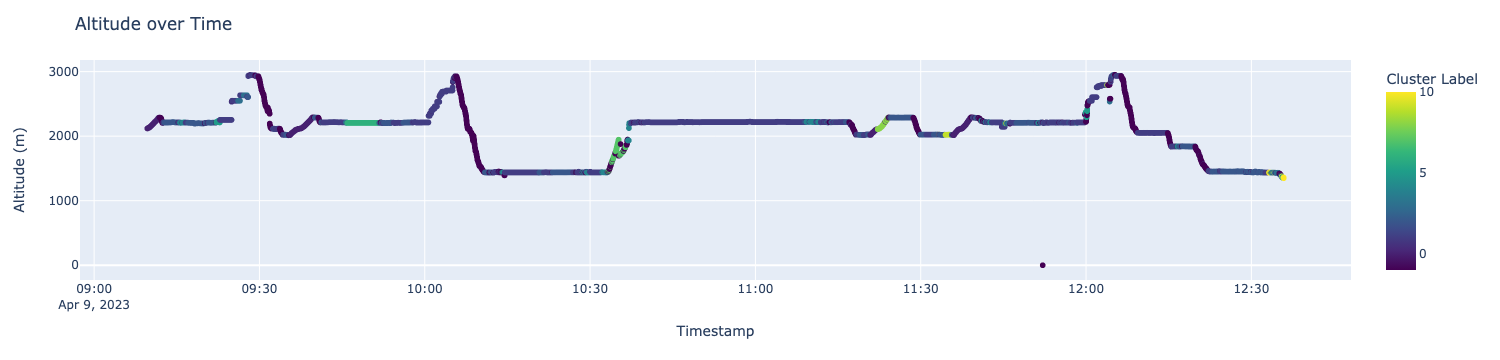

In [171]:
features = [
            'Speed(m/s)', 
            'Course',
            'TrueHeading',  
            # 'Alt(m)'
           ]

X = df[features]

# Pipeline for scaling and clustering
pipeline_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(
        eps=0.195,
        min_samples=30,
        ))
])

# Fit the pipeline and safe cluster
clusters = pipeline_dbscan.fit_predict(X)

# Add the cluster labels to your dataframe
df['Cluster'] = clusters
number_clusters=df['Cluster'].nunique()
print(f'Number of clusters: {number_clusters}')

plot_clusters(df=df,cluster_column_name='Cluster')

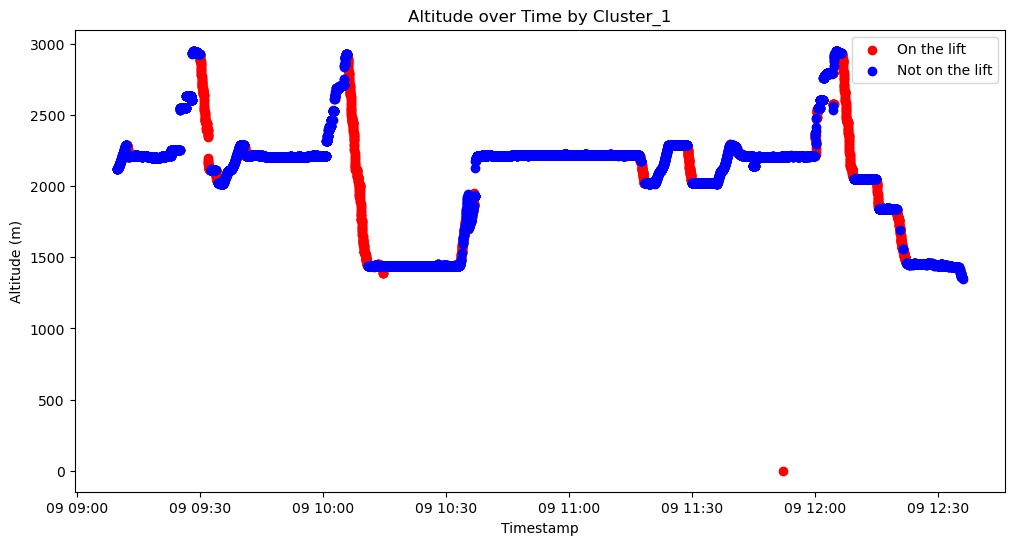

In [170]:
lift_clusters = [-1]

plot_lift_no_lift(df,lift_clusters)

In [68]:
df_95.shape

(5717, 45)

# Extract labeled data

In [69]:
# cluster labels that have been identified to represent being on the lift
lift_clusters = [1, 2]

# add column 'on_lift' to DataFrame
# '1' if cluster label is in lift_clusters,  '0' otherwise
# use initial df_95 with all columns

df_95['on_lift'] = df_95['Cluster_1'].apply(lambda x: 1 if x in lift_clusters else 0)
df_95.head()

,Timestamp,accelX(g),accelY(g),accelZ(g),accelUserX(g),accelUserY(g),accelUserZ(g),gyroX(rad/s),gyroY(rad/s),gyroZ(rad/s),...,Pressure(kilopascals),RelativeAltitude(meters),magX(µT),magY(µT),magZ(µT),calMagX(µT),calMagY(µT),calMagZ(µT),Cluster_1,on_lift
0,2023-04-07 09:13:51.953,0.1534,-0.5180,-0.8395,-0.0108,0.0025,-0.0101,0.0166,0.0051,0.0318,...,85.1650,-0.0343,-135.5536,36.2744,-65.9999,-27.1108,6.9614,-7.9447,0,0
1,2023-04-07 09:13:52.957,0.1562,-0.5118,-0.8333,-0.0094,0.0023,0.0054,0.0042,0.0032,-0.0066,...,85.1649,-0.0264,-135.1368,36.0763,-66.4066,-26.8162,7.0748,-8.5435,0,0
2,2023-04-07 09:13:53.961,0.1508,-0.5035,-0.8493,-0.0059,0.0053,-0.0014,0.0020,0.0021,0.0225,...,85.1648,-0.0184,-135.6325,36.4408,-67.0690,-27.0917,7.1687,-9.2339,0,0
3,2023-04-07 09:13:54.965,0.1604,-0.5134,-0.8229,-0.0070,0.0025,0.0136,0.0594,0.0147,0.0097,...,85.1648,-0.0184,-135.1522,36.4185,-66.2895,-26.4431,7.0141,-7.9350,0,0
4,2023-04-07 09:13:55.969,0.1569,-0.5341,-0.8330,0.0065,-0.0080,0.0061,-0.0024,0.0176,0.0147,...,85.1648,-0.0184,-136.8931,36.2061,-66.0967,-28.3148,7.0149,-8.3881,0,0


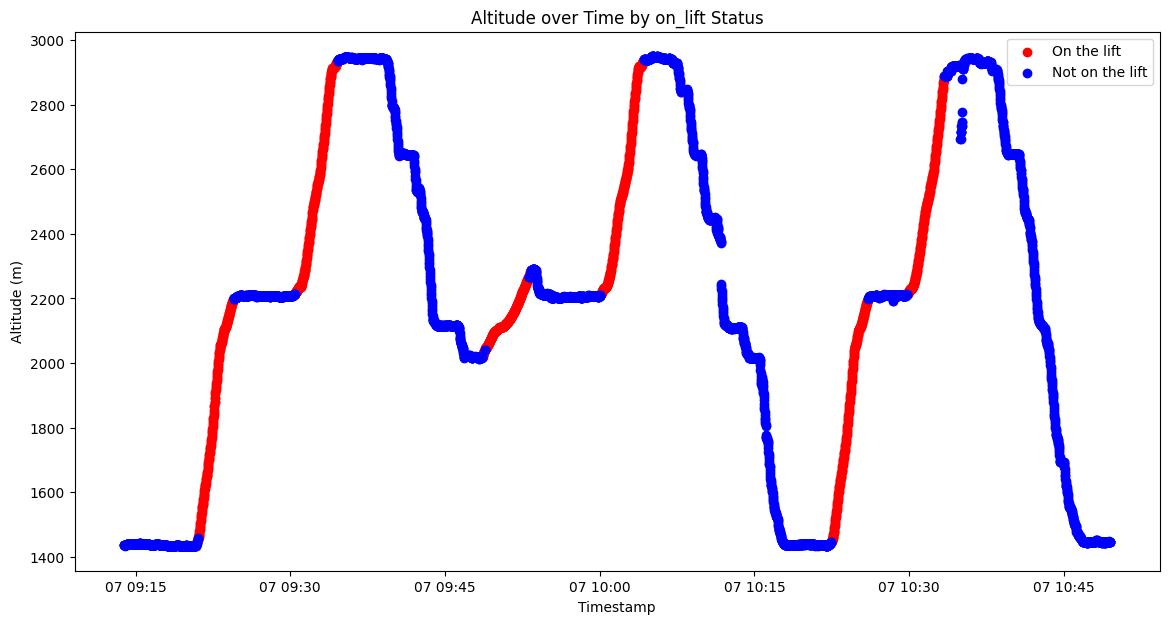

In [70]:
# Plot for Altitude over Time, colored by 'on_lift' status
plt.figure(figsize=(14, 7))

# Plot points where 'on_lift' is 1 with one color
plt.scatter(df_95.loc[df_95['on_lift'] == 1, 'Timestamp'],
            df_95.loc[df_95['on_lift'] == 1, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot points where 'on_lift' is 0 with another color
plt.scatter(df_95.loc[df_95['on_lift'] == 0, 'Timestamp'],
            df_95.loc[df_95['on_lift'] == 0, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by on_lift Status')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()

In [71]:
# export DataFrame to CSV
df_95.to_csv('df_95_labeled.csv', index=False)

In [72]:
from google.colab import files

# Download the file to your local computer
files.download('df_95_labeled.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#df_310

In [99]:
# Select relevant features
features_310 = ['Speed(m/s)', 'Course']

X_310 = df_310_clean_1[features_310]

3


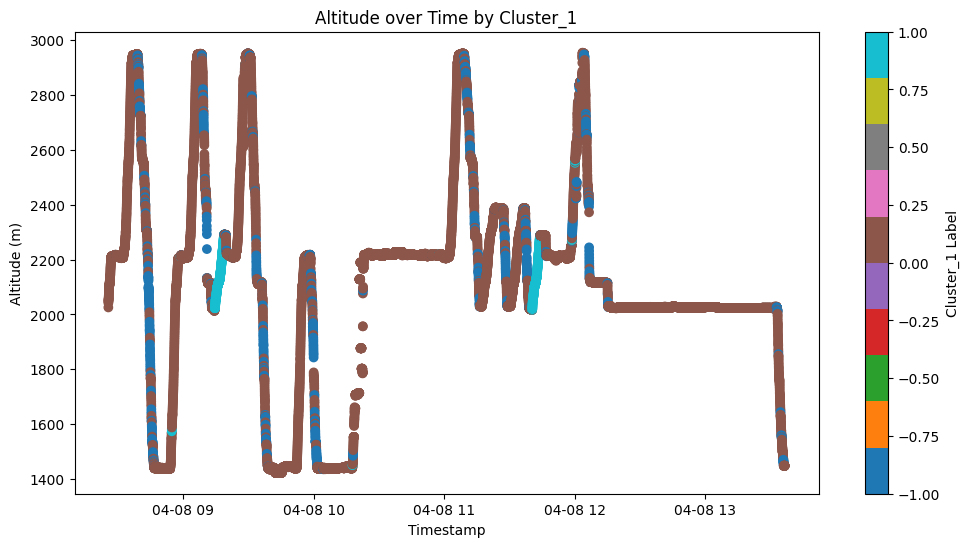

In [166]:
# Pipeline for scaling and clustering
pipeline_dbscan_310 = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(
        eps=0.15,
        min_samples=70,
        metric = 'haversine'
        ))
])


# Fit the pipeline
clusters_310 = pipeline_dbscan_310.fit_predict(X_310)

# Add the cluster labels to your dataframe
df_310_clean_1['Cluster_1'] = clusters_310

print(df_310_clean_1['Cluster_1'].nunique())

# Plot for Altitude over Time
plt.figure(figsize=(12, 6))
plt.scatter(df_310_clean_1['Timestamp'],
            df_310_clean_1['Alt(m)'],
            c=df_310_clean_1['Cluster_1'],
            cmap='tab10',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.colorbar(label='Cluster_1 Label')
plt.show()

In [164]:
print(df_310_clean_1['Cluster_1'].unique())

[ 0 -1  1]


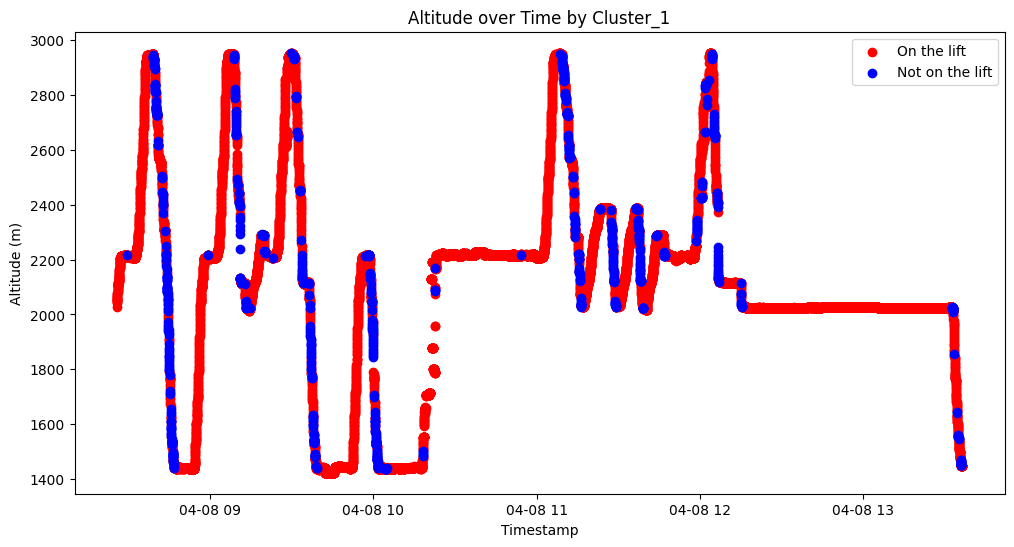

In [178]:
lift_clusters = [0,1]

lift_ride_condition = df_310_clean_1['Cluster_1'].isin(lift_clusters)
other_condition = ~lift_ride_condition

plt.figure(figsize=(12, 6))

# Plot lift rides with one color
plt.scatter(df_310_clean_1.loc[lift_ride_condition, 'Timestamp'],
            df_310_clean_1.loc[lift_ride_condition, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot other clusters with another color
plt.scatter(df_310_clean_1.loc[other_condition, 'Timestamp'],
            df_310_clean_1.loc[other_condition, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()


# Feature engineering

In [281]:
# df=df_95_clean_1
df=df_310_clean_1

# switch between data frames

##### Rate of altitude change

In [282]:
# Calculate the time difference in seconds between consecutive points.
df['Time_diff'] = df['Timestamp'].diff().dt.total_seconds().fillna(0)

# Calculate the altitude change between consecutive points.
df['Altitude_change'] = df['Alt(m)'].diff().fillna(0)

# Calculate the rate of altitude change.
df['Rate_of_altitude_change'] = df['Altitude_change'] / df['Time_diff']

In [276]:
df['Rate_of_altitude_change']

0            NaN
1       0.424085
2       0.413873
3      -0.067601
4       0.000000
          ...   
5712   -0.218243
5713   -0.573876
5714   -0.506294
5715   -0.191129
5716    0.042919
Name: Rate_of_altitude_change, Length: 5717, dtype: float64

##### Changes of speed

In [283]:
# Calculate rolling variance or standard deviation of speed

window_size = 2 # in sec?

df['Speed_variance'] = df['Speed(m/s)'].rolling(window=window_size).var().fillna(0)
df['Speed_std'] = df['Speed(m/s)'].rolling(window=window_size).std().fillna(0)

##### Change in Course

In [284]:
df['Course_change'] = df['Course'].diff().abs().fillna(0)

##### Vertical to Horizontal Speed Ratio

In [285]:
# Calculate cumulative altitude gain.
df['Cumulative_alt_gain'] = df['Altitude_change'][df['Altitude_change'] > 0].cumsum().fillna(method='ffill').fillna(0)

# Calculate cumulative altitude loss.
df['Cumulative_alt_loss'] = df['Altitude_change'][df['Altitude_change'] < 0].cumsum().fillna(method='ffill').fillna(0)
df['Cumulative_alt_gain']

0                 NaN
1           15.920899
2           22.295655
3                 NaN
4           25.549439
             ...     
18572             NaN
18573             NaN
18574             NaN
18575    10335.482786
18576             NaN
Name: Cumulative_alt_gain, Length: 18577, dtype: float64

3


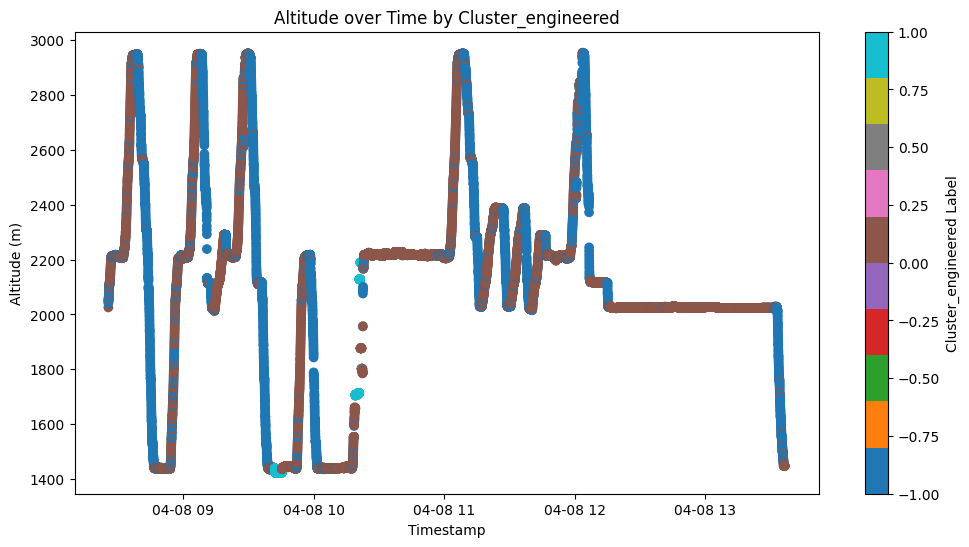

[ 0 -1  1]


In [291]:
# Select relevant features
features_engineered = [
                        'Speed(m/s)',
                       'Speed_std',
                       'Speed_Variance',
                       'Course_change',
                    #    'Cumulative_alt_gain',
                    #    'Cumulative_alt_loss',
                    #    'Rate_of_altitude_change', # remove first row in order to use this

                       ]

X_1_engineered = df[features_engineered]

# Pipeline for scaling and clustering
pipeline_dbscan_engineered = Pipeline([
    ('scaler', StandardScaler()),
    ('dbscan', DBSCAN(
        eps=0.15,
        min_samples=70,
        ))
])

# Fit the pipeline
clusters_engineered = pipeline_dbscan_engineered.fit_predict(X_1_engineered)

# Add the cluster labels to your dataframe
df['Cluster_engineered'] = clusters_engineered

print(df['Cluster_engineered'].nunique())


# Plot for Altitude over Time
plt.figure(figsize=(12, 6))
plt.scatter(df['Timestamp'],
            df['Alt(m)'],
            c=df['Cluster_engineered'],
            cmap='tab10',
            marker='o')

plt.title('Altitude over Time by Cluster_engineered')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.colorbar(label='Cluster_engineered Label')
plt.show()

print(df['Cluster_engineered'].unique())

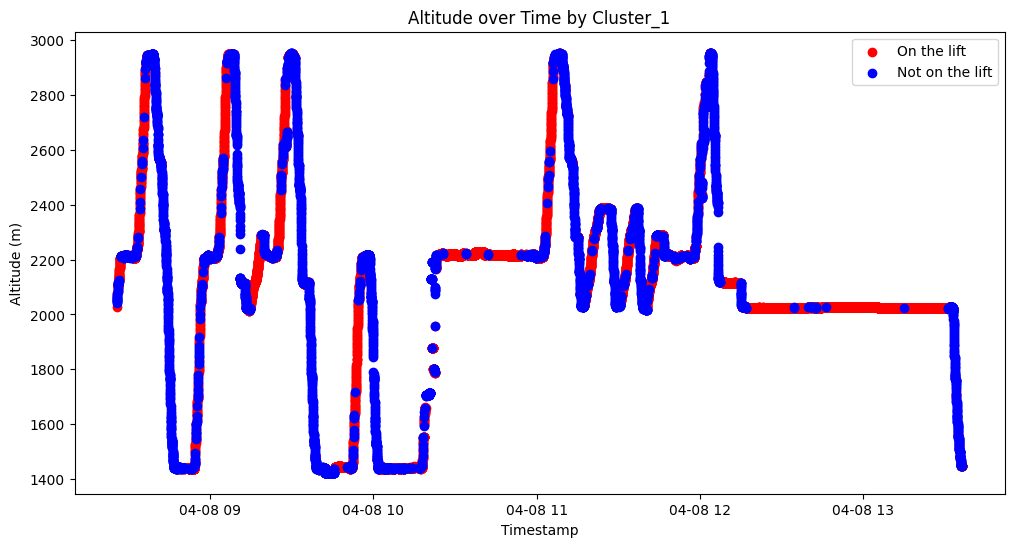

In [292]:
lift_clusters = [0]

lift_ride_condition = df['Cluster_engineered'].isin(lift_clusters)
other_condition = ~lift_ride_condition

plt.figure(figsize=(12, 6))

# Plot lift rides with one color
plt.scatter(df.loc[lift_ride_condition, 'Timestamp'],
            df.loc[lift_ride_condition, 'Alt(m)'],
            c='red',
            label='On the lift',
            marker='o')

# Plot other clusters with another color
plt.scatter(df.loc[other_condition, 'Timestamp'],
            df.loc[other_condition, 'Alt(m)'],
            c='blue',
            label='Not on the lift',
            marker='o')

plt.title('Altitude over Time by Cluster_1')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.legend()
plt.show()
